# Modeling - XGBoost
(Using the top **20** features)

### Importing the libraries and Data

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import _pickle as pickle

In [2]:
with open("top20_df.pkl", "rb") as fp:
    df = pickle.load(fp)

## Preparing the Data

### Scaling the Data

In [3]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

features_df = df.drop(["Decision"], 1)

scaled_df = pd.DataFrame(scaler.fit_transform(features_df), 
                               index=features_df.index, 
                               columns=features_df.columns)

df = scaled_df.join(df.Decision)

### Train, test, split the DF

In [4]:
X = df.drop(["Decision"], 1)
y = df.Decision

# Train, test, split
X_train, X_test, y_train, y_test = train_test_split(X, y)

### Functions

In [5]:
def plot_confusion_matrix(y_true, y_pred, labels=["Sell", "Buy", "Hold"], 
                          normalize=False, title=None, cmap=plt.cm.cividis):

    cm = confusion_matrix(y_true, y_pred)
    fig, ax = plt.subplots(figsize=(12,6))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=labels, yticklabels=labels,
           title=title,
           ylabel='ACTUAL',
           xlabel='PREDICTED')
    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")
    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="crimson" if cm[i, j] > thresh else "crimson",
                    size=26)
    ax.grid(False)
    fig.tight_layout()
    return ax

In [6]:
def mod_results(clf, X_train, X_test, y_train, y_test):
    """
    Displays the results of a fitted model with a Confusion Matrix
    """
    # Getting predictions for the training set
    train_preds = clf.predict(X_train)

    # Getting predictions for the testing set
    test_preds = clf.predict(X_test)

    # Scores for both predictions
    train_score = accuracy_score(y_train, train_preds)
    test_score = accuracy_score(y_test, test_preds)

    # Printing Results
    print(f"Training Accuracy: {train_score} \t\t Testing Accuracy: {test_score}")
    
    # Displaying Confusion Matrix
    plot_confusion_matrix(y_test, test_preds, title="Confusion Matrix")
    np.set_printoptions(precision=1)
    
    # Plot non-normalized confusion matrix
    plt.show()

## XGBoost Modeling

In [7]:
# Preventing error from occuring: XGBoost causes kernel to die.
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'
from xgboost import XGBClassifier
import xgboost as xgb

In [8]:
# Instatiating the model classifier
clf = xgb.XGBClassifier()

# Fitting to the Data
clf.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, learning_rate=0.1,
       max_delta_step=0, max_depth=3, min_child_weight=1, missing=None,
       n_estimators=100, n_jobs=1, nthread=None,
       objective='multi:softprob', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
       subsample=1, verbosity=1)

XGBoost
Training Accuracy: 0.49611088950937376 		 Testing Accuracy: 0.45109183368232125


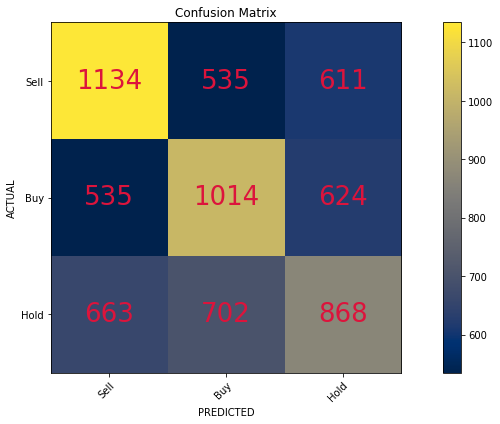

In [9]:
# Printing Results
print("XGBoost")

# Modeling and Confusion Matrix
mod_results(clf, X_train, X_test, y_train, y_test)

## XGBoost - Results
with the scaled __top 20__ features

In [10]:
# XGBoost
# Training Accuracy: 0.49611088950937376 		 Testing Accuracy: 0.45109183368232125

### RandomizedSearchCV - XGBoost

In [11]:
from sklearn.model_selection import RandomizedSearchCV

In [12]:
params = {"booster": ["gbtree", "gblinear", "dart"]}

In [13]:
ran_search = RandomizedSearchCV(clf, params, n_iter=1, verbose=5)

%timeit ran_search.fit(X_train, y_train)

/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV] booster=dart ....................................................
[CV] .......... booster=dart, score=0.45991624289560273, total=  14.1s
[CV] booster=dart ....................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   14.3s remaining:    0.0s


[CV] ........... booster=dart, score=0.4523560209424084, total=  14.7s
[CV] booster=dart ....................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   29.1s remaining:    0.0s


[CV] .......... booster=dart, score=0.45654450261780105, total=  14.2s


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   43.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   43.5s finished
/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV] booster=gbtree ..................................................
[CV] ........ booster=gbtree, score=0.45991624289560273, total=   8.2s
[CV] booster=gbtree ..................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    8.3s remaining:    0.0s


[CV] ......... booster=gbtree, score=0.4523560209424084, total=   8.3s
[CV] booster=gbtree ..................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   16.8s remaining:    0.0s


[CV] ........ booster=gbtree, score=0.45654450261780105, total=   8.0s


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   24.9s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   24.9s finished
/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV] booster=dart ....................................................
[CV] .......... booster=dart, score=0.45991624289560273, total=  14.8s
[CV] booster=dart ....................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   15.1s remaining:    0.0s


[CV] ........... booster=dart, score=0.4523560209424084, total=  14.2s
[CV] booster=dart ....................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   29.4s remaining:    0.0s


[CV] .......... booster=dart, score=0.45654450261780105, total=  13.7s


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   43.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   43.2s finished
/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV] booster=gblinear ................................................
[CV] ....... booster=gblinear, score=0.3438528268022734, total=   2.2s
[CV] booster=gblinear ................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.2s remaining:    0.0s


[CV] ....... booster=gblinear, score=0.3443530291697831, total=   2.2s
[CV] booster=gblinear ................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    4.5s remaining:    0.0s


[CV] ...... booster=gblinear, score=0.34854151084517576, total=   2.2s


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    6.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    6.7s finished
/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV] booster=dart ....................................................
[CV] .......... booster=dart, score=0.45991624289560273, total=  14.4s
[CV] booster=dart ....................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   14.6s remaining:    0.0s


[CV] ........... booster=dart, score=0.4523560209424084, total=  15.5s
[CV] booster=dart ....................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   30.2s remaining:    0.0s


[CV] .......... booster=dart, score=0.45654450261780105, total=  14.0s


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   44.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   44.3s finished
/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV] booster=gblinear ................................................
[CV] ....... booster=gblinear, score=0.3438528268022734, total=   2.2s
[CV] booster=gblinear ................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.2s remaining:    0.0s


[CV] ....... booster=gblinear, score=0.3443530291697831, total=   2.3s
[CV] booster=gblinear ................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    4.5s remaining:    0.0s


[CV] ...... booster=gblinear, score=0.34854151084517576, total=   2.2s


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    6.8s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    6.8s finished
/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV] booster=gblinear ................................................
[CV] ....... booster=gblinear, score=0.3438528268022734, total=   2.2s
[CV] booster=gblinear ................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.2s remaining:    0.0s


[CV] ....... booster=gblinear, score=0.3443530291697831, total=   2.2s
[CV] booster=gblinear ................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    4.5s remaining:    0.0s


[CV] ...... booster=gblinear, score=0.34854151084517576, total=   2.2s


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    6.8s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    6.8s finished
/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV] booster=dart ....................................................
[CV] .......... booster=dart, score=0.45991624289560273, total=  13.2s
[CV] booster=dart ....................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   13.3s remaining:    0.0s


[CV] ........... booster=dart, score=0.4523560209424084, total=  13.6s
[CV] booster=dart ....................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   27.1s remaining:    0.0s


[CV] .......... booster=dart, score=0.45654450261780105, total=  13.2s


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   40.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   40.4s finished


The slowest run took 6.41 times longer than the fastest. This could mean that an intermediate result is being cached.
36.5 s ± 24.4 s per loop (mean ± std. dev. of 7 runs, 1 loop each)


## Using tuned parameters on XGBoost

In [14]:
# RandomizedSearchCV Results

print("Mean Training Score:", np.mean(ran_search.cv_results_['mean_train_score']))
print("Mean Testing Score:", ran_search.score(X_train, y_train))
print("\nBest Parameter Found:")
ran_search.best_params_

/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)


Mean Training Score: 0.5111437283913781
Mean Testing Score: 0.49611088950937376

Best Parameter Found:


{'booster': 'dart'}

XGBoost with tuned Parameters
Training Accuracy: 0.49611088950937376 		 Testing Accuracy: 0.45109183368232125


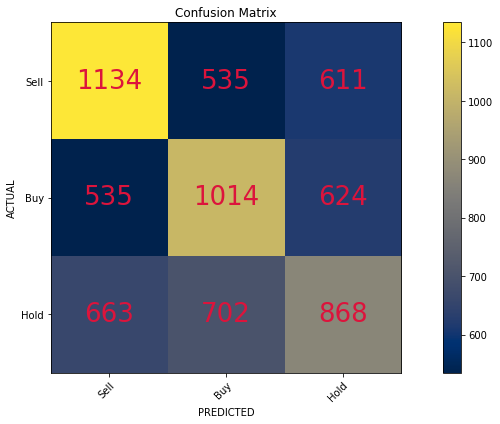

In [15]:
# Instatiating the model classifier with GridSearch's best parameters
clf = ran_search.best_estimator_

# Fitting the model
clf.fit(X_train, y_train)

# Printing Results
print("XGBoost with tuned Parameters")
mod_results(clf, X_train, X_test, y_train, y_test)

#### Compared to the Top 10 selected features, the top 20 features have improved the training accuracy but decreased in testing accuracy. It can possibly concluded that by increasing the feature set may start overfitting the model. The top 10 features selected still remain the best option.